In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\victo\Desktop\kaggle\anomaly_nab\realKnownCause\ambient_temperature_system_failure.csv')

In [3]:
df.dtypes

timestamp     object
value        float64
dtype: object

In [4]:
#check for nulls
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [5]:
#Known anomaly points 
anomaly_points = [
        ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
        ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
        ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
        ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [7]:
#Show anomaly time occurences just for viewwing not for training
for start, end in anomaly_points:
    df.loc[((df['timestamp'] >= start) & (df['timestamp'] <= end)), 'anomaly'] = 1
df = df.fillna(0)

In [24]:
print(f"Approx {round(len(df.loc[df['anomaly'] == 1])/ (df.shape[0]) *100,1)}% are anomalies")

Approx 2.6% are anomalies


In [8]:
#show distribution of machine internal temp in F
df['value'].describe()

count    7267.000000
mean       71.242433
std         4.247509
min        57.458406
25%        68.369411
50%        71.858493
75%        74.430958
max        86.223213
Name: value, dtype: float64

Text(0.5, 1.0, 'Temperature Distribution')

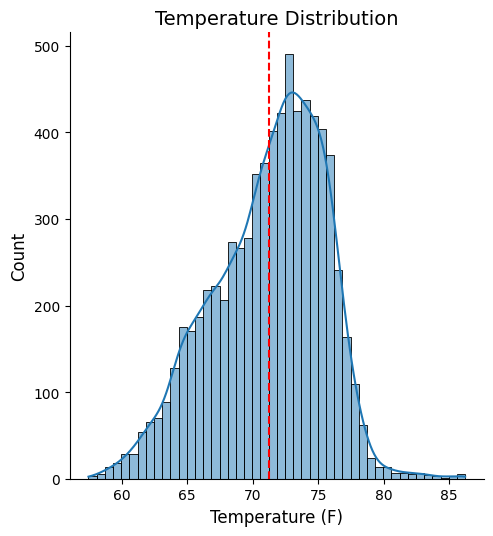

In [9]:
sns.displot(df['value'].values, kde=True)
plt.axvline(x=df['value'].values.mean(),
            color='red',ls='--')
plt.xlabel("Temperature (F)", size=12)
plt.ylabel("Count", size=12)
plt.title("Temperature Distribution", size=14)


In [116]:
anomaly_data =df.loc[df['anomaly']==1]

(array([15887., 15918., 15949., 15979., 16010., 16040., 16071., 16102.,
        16130., 16161., 16191., 16222.]),
 [Text(15887.0, 0, '2013-07'),
  Text(15918.0, 0, '2013-08'),
  Text(15949.0, 0, '2013-09'),
  Text(15979.0, 0, '2013-10'),
  Text(16010.0, 0, '2013-11'),
  Text(16040.0, 0, '2013-12'),
  Text(16071.0, 0, '2014-01'),
  Text(16102.0, 0, '2014-02'),
  Text(16130.0, 0, '2014-03'),
  Text(16161.0, 0, '2014-04'),
  Text(16191.0, 0, '2014-05'),
  Text(16222.0, 0, '2014-06')])

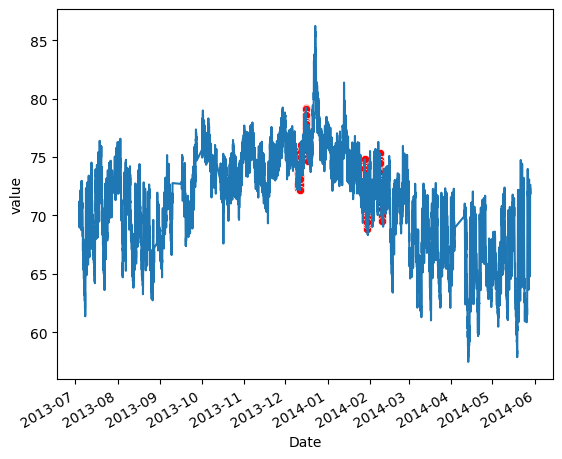

In [117]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='timestamp', y='value', data=anomaly_data,color='red')
sns.lineplot(x = df['timestamp'].values, y=df['value'].values)
plt.xlabel("Date")
plt.xticks(rotation=30, ha='right')




In [143]:
#Adjust contaminator_factor based on what projected # of anomalies are
contaminator_factor = .05
clfISO = IsolationForest(max_samples = .25, random_state= 111, contamination = contaminator_factor, n_estimators =300 )

In [154]:
#we train another one with a lowwer contam value
clfISO2 = IsolationForest(max_samples = .25, random_state= 111, contamination = .01, n_estimators =300 )

In [155]:
#reshape to (x,1) array 
temp_data= df['value'].values.reshape(-1, 1)

In [156]:
#fit model to data and run inference
clfISO = clfISO.fit(temp_data)
y_predictions= clfISO.predict(temp_data)
#Isolated forests outputs 1 as anomaly and -1 as normal so we map to our data
df['results'] = y_predictions
df['results'] = df['results'].map( {1:0, -1:1} )
results_data=df.loc[df['results']==1]

In [157]:
clfISO2 = clfISO2.fit(temp_data)
y_predictions2= clfISO2.predict(temp_data)
#Isolated forests outputs 1 as anomaly and -1 as normal so we map to our data
df['results2'] = y_predictions2
df['results2'] = df['results2'].map( {1:0, -1:1} )
results_data2=df.loc[df['results2']==1]

(array([15887., 15918., 15949., 15979., 16010., 16040., 16071., 16102.,
        16130., 16161., 16191., 16222.]),
 [Text(15887.0, 0, '2013-07'),
  Text(15918.0, 0, '2013-08'),
  Text(15949.0, 0, '2013-09'),
  Text(15979.0, 0, '2013-10'),
  Text(16010.0, 0, '2013-11'),
  Text(16040.0, 0, '2013-12'),
  Text(16071.0, 0, '2014-01'),
  Text(16102.0, 0, '2014-02'),
  Text(16130.0, 0, '2014-03'),
  Text(16161.0, 0, '2014-04'),
  Text(16191.0, 0, '2014-05'),
  Text(16222.0, 0, '2014-06')])

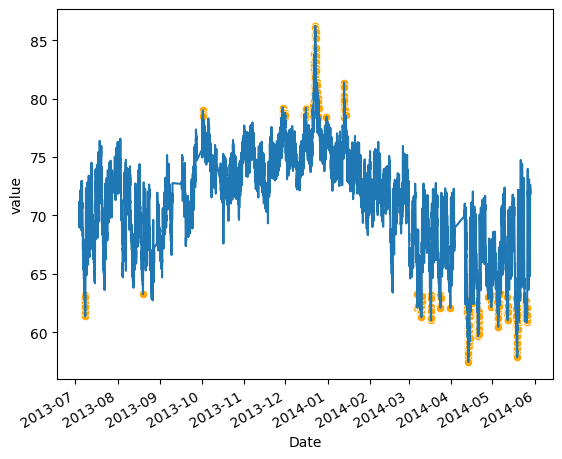

In [158]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='timestamp', y='value', data=results_data,color='orange')
sns.lineplot(x = df['timestamp'].values, y=df['value'].values)
plt.xlabel("Date")
plt.xticks(rotation=30, ha='right')



(array([15887., 15918., 15949., 15979., 16010., 16040., 16071., 16102.,
        16130., 16161., 16191., 16222.]),
 [Text(15887.0, 0, '2013-07'),
  Text(15918.0, 0, '2013-08'),
  Text(15949.0, 0, '2013-09'),
  Text(15979.0, 0, '2013-10'),
  Text(16010.0, 0, '2013-11'),
  Text(16040.0, 0, '2013-12'),
  Text(16071.0, 0, '2014-01'),
  Text(16102.0, 0, '2014-02'),
  Text(16130.0, 0, '2014-03'),
  Text(16161.0, 0, '2014-04'),
  Text(16191.0, 0, '2014-05'),
  Text(16222.0, 0, '2014-06')])

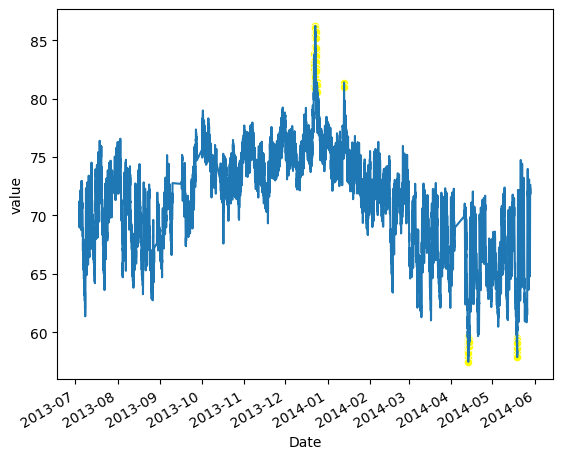

In [159]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='timestamp', y='value', data=results_data2,color='yellow')
sns.lineplot(x = df['timestamp'].values, y=df['value'].values)
plt.xlabel("Date")
plt.xticks(rotation=30, ha='right')


In [161]:
df.loc[df['results2']==1]

,timestamp,value,anomaly,results,results2
3697,2013-12-21 20:00:00,82.289240,0.0,1,1
3698,2013-12-21 21:00:00,82.989869,0.0,1,1
3699,2013-12-21 22:00:00,83.247886,0.0,1,1
3700,2013-12-21 23:00:00,82.519659,0.0,1,1
3701,2013-12-22 00:00:00,82.736802,0.0,1,1
...,...,...,...,...,...
7034,2014-05-18 23:00:00,58.160342,0.0,1,1
7035,2014-05-19 00:00:00,58.423639,0.0,1,1
7036,2014-05-19 01:00:00,57.861906,0.0,1,1
7037,2014-05-19 02:00:00,58.639295,0.0,1,1
